In [144]:
import pandas as pd
import glob
import os
from tqdm import tqdm
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [82]:
DAY2IDX = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}
TIME2IDX = {"Morning":0, "Afternoon":1, "Evening":2, "Night":3}

def get_time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

In [103]:
dir_items = os.listdir("./final_csv_files")
req_folders = ["data_4", "data_5"]
folders = [item for item in dir_items if os.path.isdir(os.path.join("./final_csv_files", item)) and item in req_folders] 
dataframes = []
for idx, folder in enumerate(folders): #################################
    print(folder)
    data_files = glob.glob(f"./final_csv_files/{folder}/*.csv") # Take 'n' number of files from each location
    for file in tqdm(data_files):
        df = pd.read_csv(file)
        # df = df[(5875 >= df["frequency"]) & (df["frequency"] >= 5725)]
        # df = df.loc[(df["frequency"] - 2412).abs().idxmin()]
        df = df[df["frequency"]==2411.978]
        closest_freq = df["frequency"]
        closest_power = df["power"]
        power_value = df.loc[df['frequency'] == 2411.978, 'power'].values[0]
        filename = os.path.basename(file)
        timestamp = int(filename.split('-')[1].split('.')[0])
        local_dt = datetime.fromtimestamp(timestamp)
        day = local_dt.strftime('%A')
        time_of_day = get_time_of_day(local_dt.hour) 
        df["Day"] = DAY2IDX[day]
        df["Time_of_Day"] = TIME2IDX[time_of_day]
        df["Location"] = idx
        dataframes.append(df)
        # date = local_dt.strftime('%x')
        # dataframes.append([value, DAY2IDX[day], TIME2IDX[time_of_day], idx, date])

# main_df = pd.DataFrame(dataframes, columns=["Power", "Day", "Time_of_Day", "Location", "Date"])
main_df = pd.concat(dataframes, ignore_index=True)
main_df = main_df.drop(columns=["center_freq"])

data_4


  0%|          | 0/901 [00:00<?, ?it/s]

100%|██████████| 901/901 [00:28<00:00, 31.52it/s]


data_5


100%|██████████| 1076/1076 [00:52<00:00, 20.39it/s]


In [104]:
main_df.loc[main_df['Location'] == 0, "Location"] = 4
main_df.loc[main_df['Location'] == 1, "Location"] = 5

In [105]:
main_df_1 = pd.read_csv("./freq_2412.csv")
main_df = pd.concat([main_df, main_df_1], ignore_index=True)
main_df

,frequency,power,Day,Time_of_Day,Location,Date
0,2411.978,-103.750,6,1,4,NaN
1,2411.978,-103.769,6,2,4,NaN
2,2411.978,-103.938,0,3,4,NaN
3,2411.978,-103.616,0,0,4,NaN
4,2411.978,-103.403,0,1,4,NaN
...,...,...,...,...,...,...
8232,NaN,-100.653,1,2,3,01/21/25
8233,NaN,-98.667,2,0,3,01/22/25
8234,NaN,-89.942,2,1,3,01/22/25
8235,NaN,-94.236,2,2,3,01/22/25


In [ ]:
main_df = main_df.drop(columns=["Location"])
main_df.to_csv("loc0_first100.csv", index=False)
df_0["Power"].min()
main_df = pd.read_csv("freq_2412.csv")
df_0 = main_df[main_df["Location"]==0]
df_0.sort_values(by="Date", ascending=True)
main_df = df_0

In [156]:
main_df

,frequency,power,Day,Time_of_Day,Location,Date
0,2411.978,-103.750,6,1,4,NaN
1,2411.978,-103.769,6,2,4,NaN
2,2411.978,-103.938,0,3,4,NaN
3,2411.978,-103.616,0,0,4,NaN
4,2411.978,-103.403,0,1,4,NaN
...,...,...,...,...,...,...
8232,NaN,-100.653,1,2,3,01/21/25
8233,NaN,-98.667,2,0,3,01/22/25
8234,NaN,-89.942,2,1,3,01/22/25
8235,NaN,-94.236,2,2,3,01/22/25


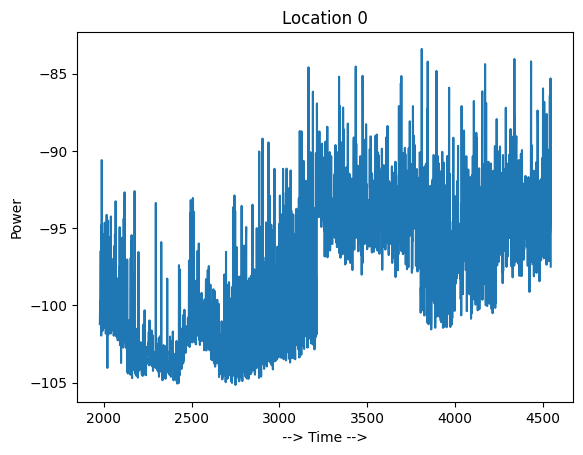

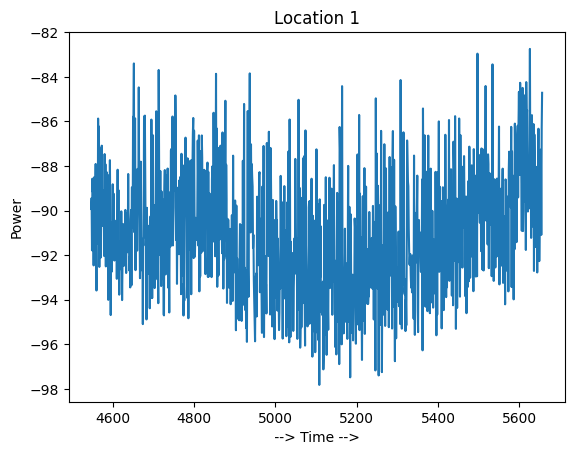

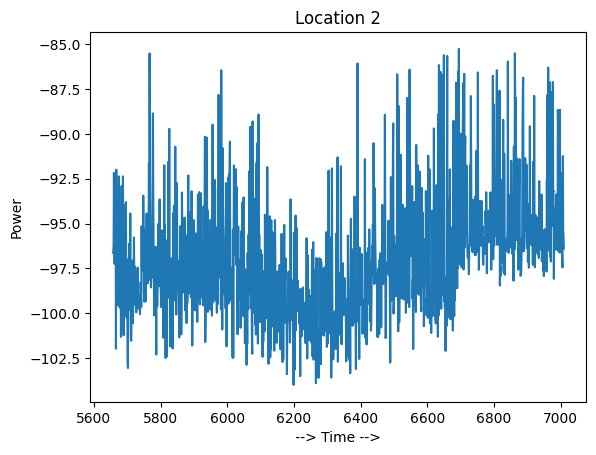

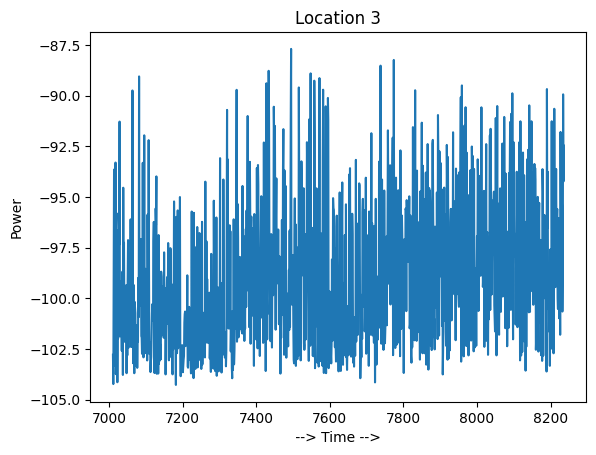

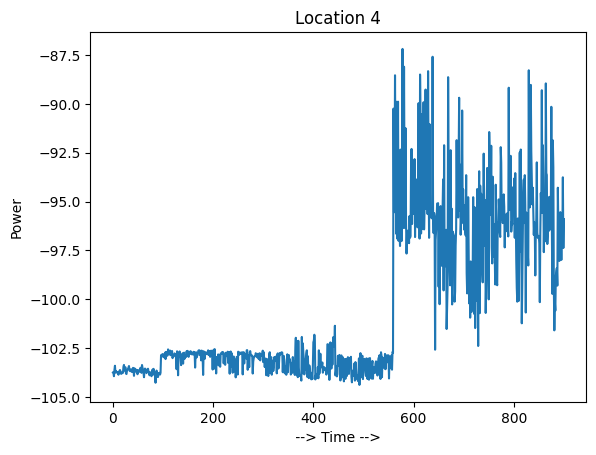

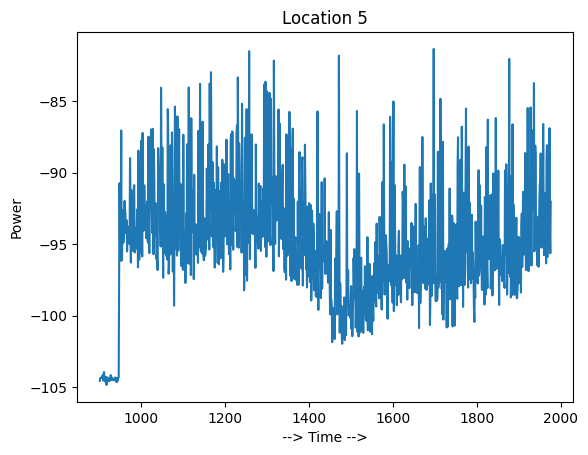

In [145]:
# LOCATION: Plot over time power graph

for location in range(6):
    df = main_df[main_df["Location"] == location]
    df = df[(np.abs(zscore(df['power'])) < 3)]
    plt.plot(df["power"])
    plt.title(f"Location {location}")
    plt.xlabel(" --> Time --> ")
    plt.ylabel("Power")
    plt.show()

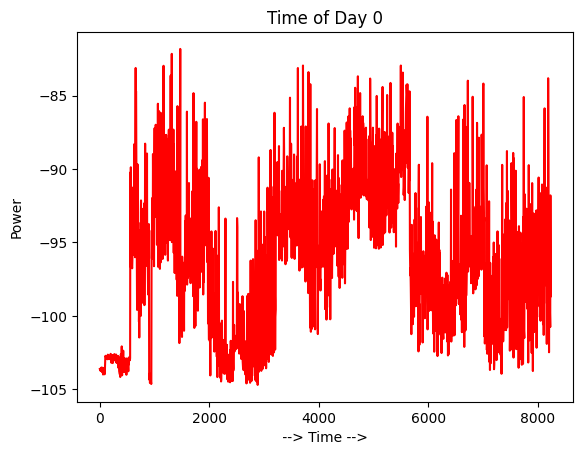

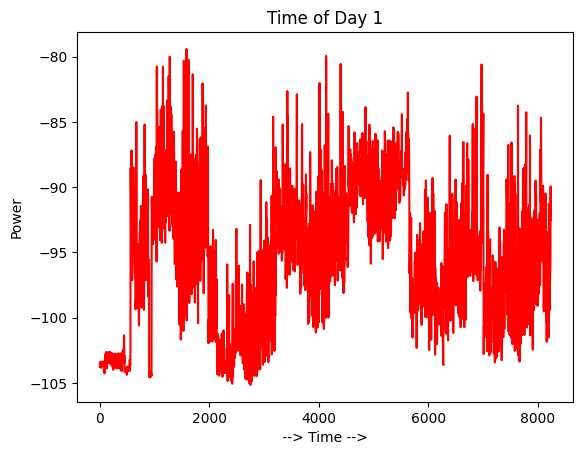

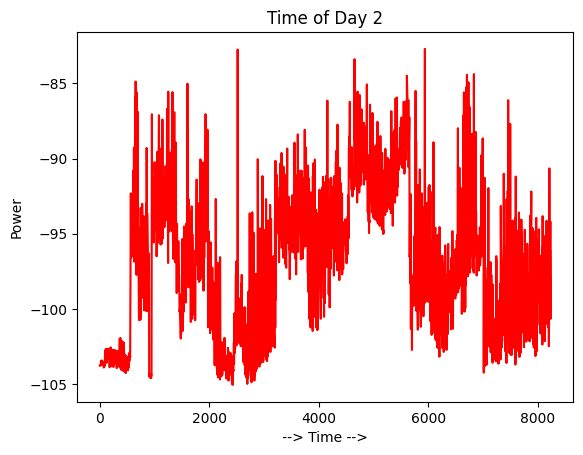

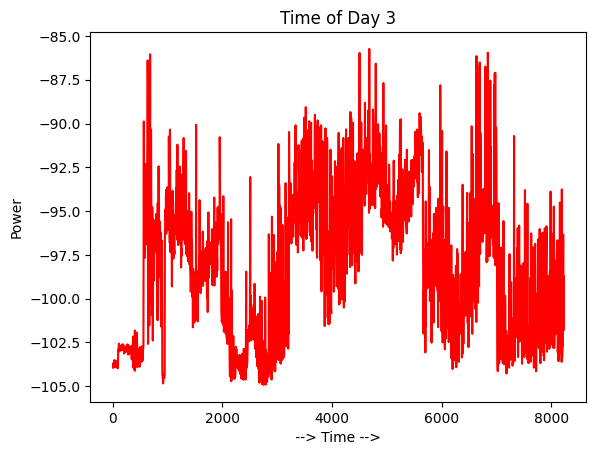

In [148]:
# TIME OF THE DAY: Plot over time power graph

for time in range(4):
    df = main_df[main_df["Time_of_Day"] == time]
    df = df[(np.abs(zscore(df['power'])) < 3)]
    plt.plot(df["power"], color="r")
    plt.title(f"Time of Day {time}")
    plt.xlabel(" --> Time --> ")
    plt.ylabel("Power")
    plt.show()

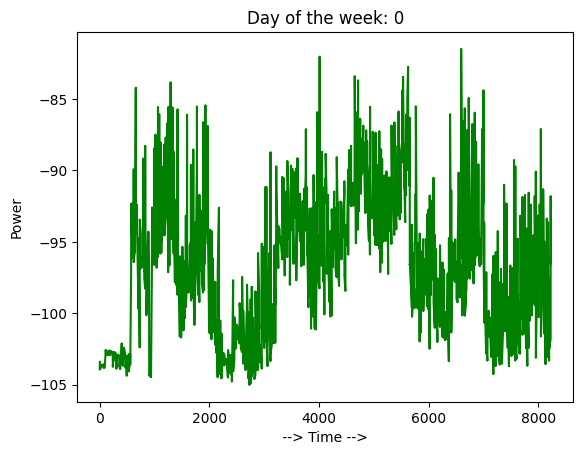

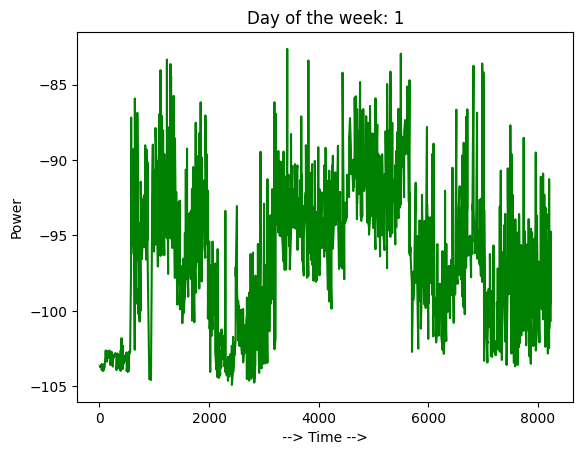

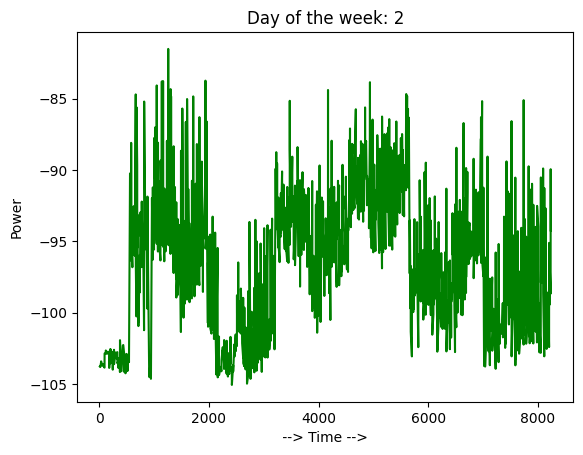

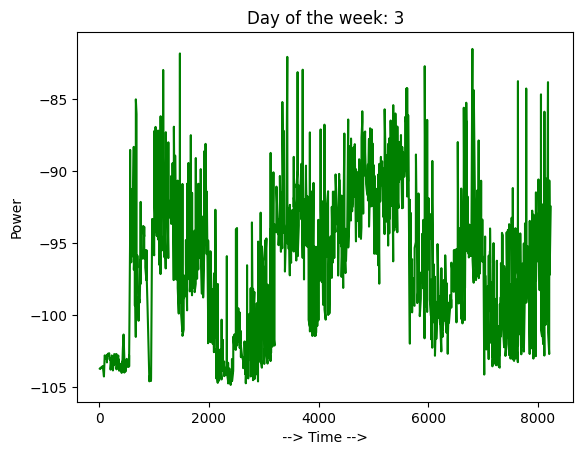

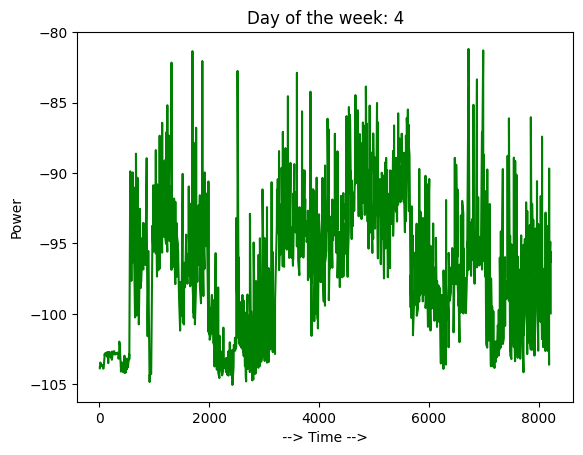

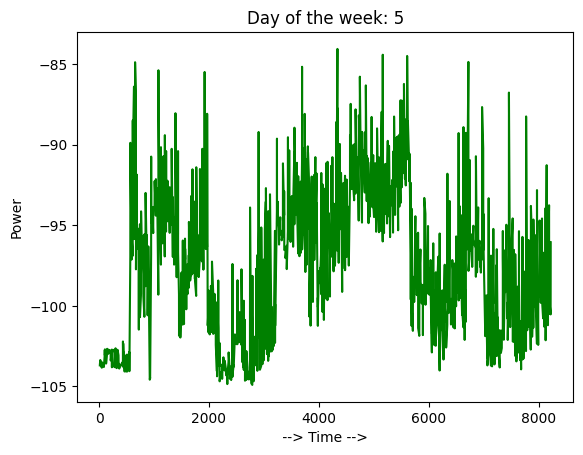

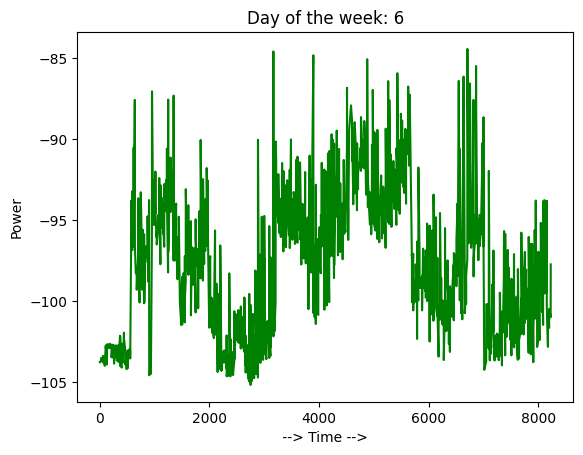

In [149]:
for day in range(7):
    df = main_df[main_df["Day"] == day]
    df = df[(np.abs(zscore(df['power'])) < 3)]
    plt.plot(df["power"], color="g")
    plt.title(f"Day of the week: {day}")
    plt.xlabel(" --> Time --> ")
    plt.ylabel("Power")
    plt.show()

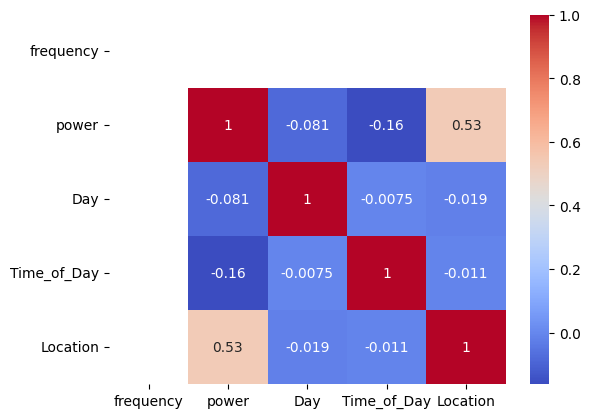

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_main = main_df.drop(["Date"], axis=1)
corr_matrix = main_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [160]:
def train_model(main_df, scale=True):
    if scale:
        scaler = MinMaxScaler()
        main_df[['power']] = scaler.fit_transform(main_df[['power']])
    
    main_df = main_df[(np.abs(zscore(main_df['power'])) < 3)]

    X = main_df[["Day", "Time_of_Day", "Location"]]
    y = main_df["power"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights = np.linspace(0.00001, 1, len(main_df))
    regressor = xgb.XGBRegressor(n_estimators=50, early_stopping_rounds=10)
    regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], sample_weight=weights[-len(y_train):], verbose=0)
    
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Mean Absolute Percentage Error (MAPE):", mape, "%")
    baseline_mse = mean_absolute_error(y_test, np.full_like(y_test, np.mean(y_train)))
    print("Base-line MAE: ", baseline_mse)
    cv_rmse = (root_mean_squared_error(y_test, y_pred)) / np.median(y_test)
    print("Coefficient of Variation (CV) of RMSE:", cv_rmse)
    print("R² Score:", regressor.score(X_test, y_test))

In [161]:
def get_location_wise_stats():
    for location in range(6):
        print(f"Location: {location}")
        df = main_df[main_df["Location"]==location]
        train_model(df, scale=False)
        print("\n")

def get_time_wise_stats():
    for time in range(4):
        print(f"Time of the Day: {time}")
        df = main_df[main_df["Time_of_Day"]==time]
        train_model(df, scale=False)
        print("\n")

def get_day_wise_stats():
    for day in range(7):
        print(f"Day of the week: {day}")
        df = main_df[main_df["Day"]==day]
        train_model(df, scale=False)
        print("\n")

get_day_wise_stats()
# train_model(main_df, scale=False)

Day of the week: 0
Mean Absolute Error (MAE): 3.146535338840404
Mean Absolute Percentage Error (MAPE): 3.3151868979751504 %
Base-line MAE:  3.8807295823499963
Coefficient of Variation (CV) of RMSE: -0.04131002517045244
R² Score: 0.3206797191954146


Day of the week: 1
Mean Absolute Error (MAE): 3.2547041261817227
Mean Absolute Percentage Error (MAPE): 3.3815209198231293 %
Base-line MAE:  4.042624626271562
Coefficient of Variation (CV) of RMSE: -0.04265544700876636
R² Score: 0.308485046086185


Day of the week: 2
Mean Absolute Error (MAE): 3.21485216466392
Mean Absolute Percentage Error (MAPE): 3.3483812771310357 %
Base-line MAE:  4.130167109148203
Coefficient of Variation (CV) of RMSE: -0.04056918236157194
R² Score: 0.38187314518455795


Day of the week: 3
Mean Absolute Error (MAE): 3.409937975531684
Mean Absolute Percentage Error (MAPE): 3.5511088016087795 %
Base-line MAE:  4.195508717948717
Coefficient of Variation (CV) of RMSE: -0.043001231978828644
R² Score: 0.31560258448162637


D

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

weights = np.linspace(0.00001, 1, len(main_df))
regressor = xgb.XGBRegressor(n_estimators=50, early_stopping_rounds=10)
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], sample_weight=weights[-len(y_train):], verbose=0)
# regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# regressor.fit(X_train, y_train)
# regressor = lgb.LGBMRegressor(n_estimators=100)
# regressor.fit(X_train, y_train)
# cat = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.025, verbose=0)
# cat.fit(X_train, y_train)
# mlp = MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)
print("R² Score:", regressor.score(X_test, y_test))

R² Score: 0.3990731984461183


In [98]:
print("R² Score:", regressor.score(X_test, y_test))

R² Score: 0.3990731984461183


0.018089922516019152

In [96]:
regressor.feature_importances_

array([0.00666157, 0.03087645, 0.962462  ], dtype=float32)

In [26]:
main_df["power"].min()

0.0

In [97]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, regressor.predict(X_test))
print(f"R² Score: {r2}")

R² Score: 0.3990731984461183


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

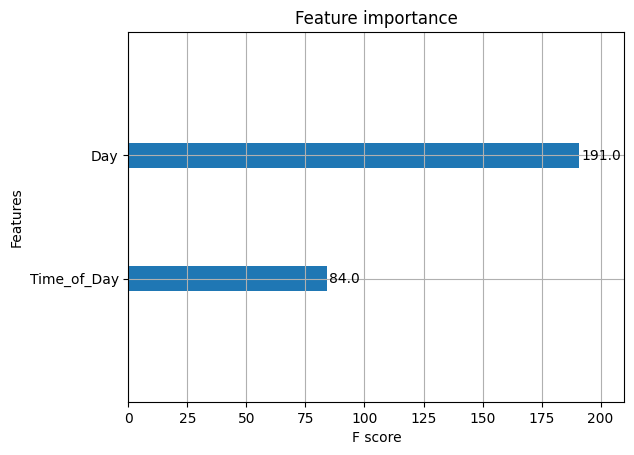

In [61]:
xgb.plot_importance(regressor)
# plt.show()

Results:

weights .1 to 1; lr = default; non standardise; mse = 3.53; min = -117.38; max = -48.64; baselinemse: 129.38; r2 = .903

weights .001 to 1; lr = default; standard scaler; mse = .309; min = -1.76; max = 4.33; baselinemse: 1.0001; r2 = .9043

weights .001 to 1; lr = default; min max scaler; mse = .5057; min = 0; max = 1; baselinemse: 0.026; r2 = .9043

900 to 928: rmse 0.078, min max scaler, r2 = 0.47, 300 csvs from each location; 0.57 Million rows; Feature imp: 15-82

2400 to 2500: rmse 0.064, min max scaler, r2 = 0.82, 300 csvs from each location; 2.22 Million rows; Feature imp: 21-73

5725 to 5875: rmse 0.061, min max scaler, r2 = 0.38, 300 csvs from each location; 3.32 Million rows; Feature imp: 40-52